In [2]:
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt


import cfl_examples.lesion_mapping.brain_util as BU
import cfl_examples.lesion_mapping.brain_vis as BV

In [4]:
# orientation and shape of atlas match the MRI images we've been looking at
nib_atlas = nib.load(os.path.join("PTSD_InVivoAtlas_labels.nii"))
print(nib.orientations.aff2axcodes(nib_atlas.affine))
print(nib_atlas.shape)

('R', 'P', 'S')


In [16]:
# load image in RAS orientation 
atlas = BU.load_brain(os.path.join("PTSD_InVivoAtlas_labels.nii"), ori='RAS')

In [40]:
print(np.unique(atlas))
print("Length:", len(np.unique(atlas)))
missing_vals = [14, 23, 24, 36, 56, 62]
print("Missing:", str(missing_vals))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  15.  16.  17.  18.  19.  20.  21.  22.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  57.  58.  59.  60.
  61.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111.]
Length: 106
Missing: [14, 23, 24, 36, 56, 62]


(array([1.608462e+06, 3.631000e+04, 5.179900e+04, 1.970500e+04,
        2.389200e+04, 5.004000e+03, 5.593000e+03, 2.787000e+03,
        7.873000e+03, 9.326000e+03, 4.489600e+04, 1.168800e+04,
        1.224000e+03, 2.097000e+03, 0.000000e+00, 3.110000e+02,
        6.390000e+02, 6.970000e+02, 5.166000e+03, 2.910000e+02,
        7.550000e+02, 6.470000e+02, 3.323000e+03, 0.000000e+00,
        0.000000e+00, 4.408000e+03, 2.091200e+04, 9.230000e+02,
        2.740000e+02, 5.380000e+02, 1.733000e+03, 5.370000e+02,
        2.310000e+02, 6.920000e+02, 2.709000e+03, 1.596000e+03,
        0.000000e+00, 2.237000e+03, 2.485000e+03, 6.820000e+02,
        5.710000e+02, 8.300000e+02, 2.914000e+03, 1.163500e+04,
        4.000000e+02, 1.024000e+03, 4.693000e+03, 1.149000e+03,
        6.523000e+03, 4.223000e+03, 2.700000e+03, 5.720000e+02,
        2.732000e+03, 8.900000e+01, 4.450000e+02, 8.730000e+02,
        0.000000e+00, 2.497000e+03, 1.231000e+03, 1.174000e+03,
        1.077000e+03, 5.200000e+01, 0.00

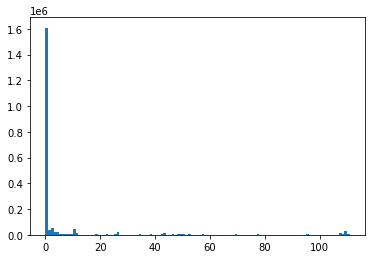

In [22]:
#histogram of how many voxels are part of each region 
plt.hist(BU.flatten(atlas), bins=111)
plt.show()

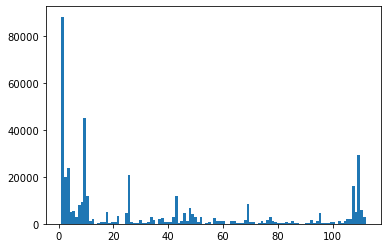

In [23]:
# same histogram, excluding 0s (empty space)
plt.hist(BU.flatten(atlas), bins=110, range=(1, 112))
plt.show()

<BarContainer object of 105 artists>

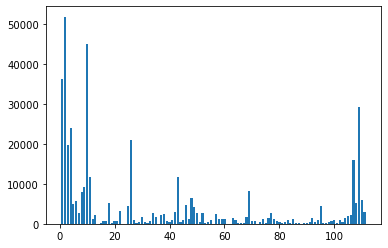

In [26]:

freqs = [np.sum(np.equal(atlas, region)) for region in np.unique(atlas)]
plt.bar(np.unique(atlas)[1:], height=freqs[1:])
plt.show()

In [66]:
regions = (np.unique(atlas)[1:])

freqs = np.array([np.sum(np.equal(atlas, region)) for region in regions])

#sort in descending order
sort_inds = np.flip(np.argsort(freqs))
sorted_regions = regions.ravel()[sort_inds.reshape(regions.shape)]
sorted_freqs = freqs.ravel()[sort_inds.reshape(freqs.shape)]

In [69]:
print(sorted_freqs)
print(sorted_freqs[:87])

[51799 44896 36310 29207 23892 20912 19705 16017 11688 11635  9326  8304
  7873  6523  6045  5593  5205  5166  5004  4693  4419  4408  4223  3323
  2914  2883  2798  2787  2732  2709  2700  2497  2485  2237  2129  2097
  1964  1803  1733  1596  1520  1432  1399  1370  1231  1224  1189  1185
  1174  1149  1115  1077  1061  1031  1024  1009   923   885   873   858
   830   785   761   755   732   697   692   682   647   639   622   572
   571   547   540   538   537   503   494   463   445   400   366   334
   311   291   282   274   273   259   252   231   216   204   199   187
   185   183   181   114   100    89    73    71    52]
105
[51799 44896 36310 29207 23892 20912 19705 16017 11688 11635  9326  8304
  7873  6523  6045  5593  5205  5166  5004  4693  4419  4408  4223  3323
  2914  2883  2798  2787  2732  2709  2700  2497  2485  2237  2129  2097
  1964  1803  1733  1596  1520  1432  1399  1370  1231  1224  1189  1185
  1174  1149  1115  1077  1061  1031  1024  1009   923   885   8

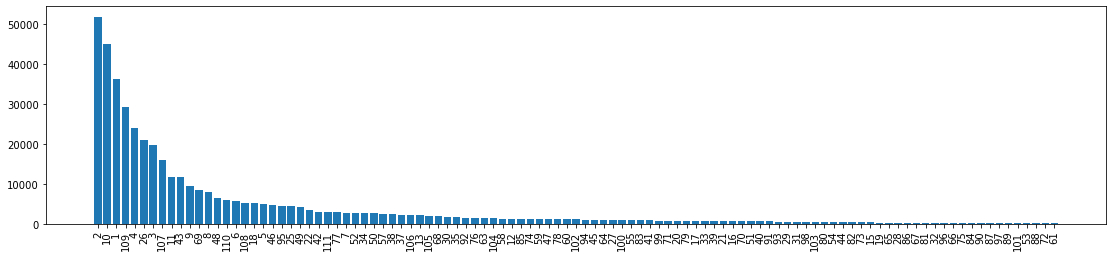

In [61]:
plt.figure(figsize=(19, 4))
plt.bar(sorted_regions.astype(int).astype(str), height=sorted_freqs)
plt.xticks(rotation=90)
plt.show()

In [64]:
# specify labels for plot (note the labels below are specifically for RAS orientation)
dir_labels = { 'saggital' :   ['P', 'A', 'D', 'V'],
               'coronal' :    ['L', 'R', 'D', 'V'],
               'horizontal' : ['L', 'R', 'A', 'P']} 

# generate interactive plots
BV.plot_interactive_panels(BU.flatten(atlas), atlas.shape, np.ones(np.prod(atlas.shape)), figsize=(12, 3), colormap='nipy_spectral', std_scale='std', dir_labels=dir_labels)

interactive(children=(IntSlider(value=0, continuous_update=False, description='brain_slice', max=123), Output(…

interactive(children=(IntSlider(value=0, continuous_update=False, description='brain_slice', max=199), Output(…

interactive(children=(IntSlider(value=0, continuous_update=False, description='brain_slice', max=81), Output()…

In [65]:
# generate interactive plots
BV.plot_interactive_panels(BU.flatten(atlas), atlas.shape, np.ones(np.prod(atlas.shape)), figsize=(12, 3), colormap='prism', std_scale='std', dir_labels=dir_labels)

interactive(children=(IntSlider(value=0, continuous_update=False, description='brain_slice', max=123), Output(…

interactive(children=(IntSlider(value=0, continuous_update=False, description='brain_slice', max=199), Output(…

interactive(children=(IntSlider(value=0, continuous_update=False, description='brain_slice', max=81), Output()…